## OneMax problem with 1000 bits

In [1]:
from thefittest.optimizers import GeneticAlgorithm
from thefittest.benchmarks import OneMax

number_of_iterations = 100
population_size = 200
string_length = 1000

optimizer = GeneticAlgorithm(fitness_function=OneMax(),
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=string_length,
                         show_progress_each=10)

optimizer.fit()

fittest = optimizer.get_fittest()

0 iteration with fitness = 535.0
10 iteration with fitness = 664.0
20 iteration with fitness = 773.0
30 iteration with fitness = 850.0
40 iteration with fitness = 905.0
50 iteration with fitness = 932.0
60 iteration with fitness = 945.0
70 iteration with fitness = 956.0
80 iteration with fitness = 966.0
90 iteration with fitness = 977.0


## Rastrign problem with 10 variables

In [2]:
import numpy as np
from thefittest.optimizers import GeneticAlgorithm
from thefittest.tools.transformations import GrayCode
from thefittest.benchmarks import Rastrigin


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=Rastrigin(),
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=30,
                         minimization=True,
                         selection="tournament_k",
                         crossover="two_point",
                         mutation="weak",
                         tour_size=6,
                         optimal_value=0.)

optimizer.fit()

fittest = optimizer.get_fittest()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])



0 iteration with fitness = 86.26485032089464
30 iteration with fitness = 0.2945999368312382
60 iteration with fitness = 0.0017871034952943177
90 iteration with fitness = 9.151653745931299e-06
120 iteration with fitness = 5.5340997562325356e-08
150 iteration with fitness = 9.160281422282424e-10
180 iteration with fitness = 9.949374657480803e-12
210 iteration with fitness = 1.829647544582258e-13
240 iteration with fitness = 1.7763568394002505e-15
The fittest individ: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 

## Custom problem

0 iteration with fitness = 19.715773258612085
10 iteration with fitness = 0.014787576104495659
20 iteration with fitness = 0.000663679419735711
30 iteration with fitness = 3.00962766428755e-06
40 iteration with fitness = 1.4623430637516075e-09
50 iteration with fitness = 8.108976936650227e-10
The fittest individ: [1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0]
The fittest individ: [ 4.99999786 11.99999263]
with fitness -5.883261678394161e-11


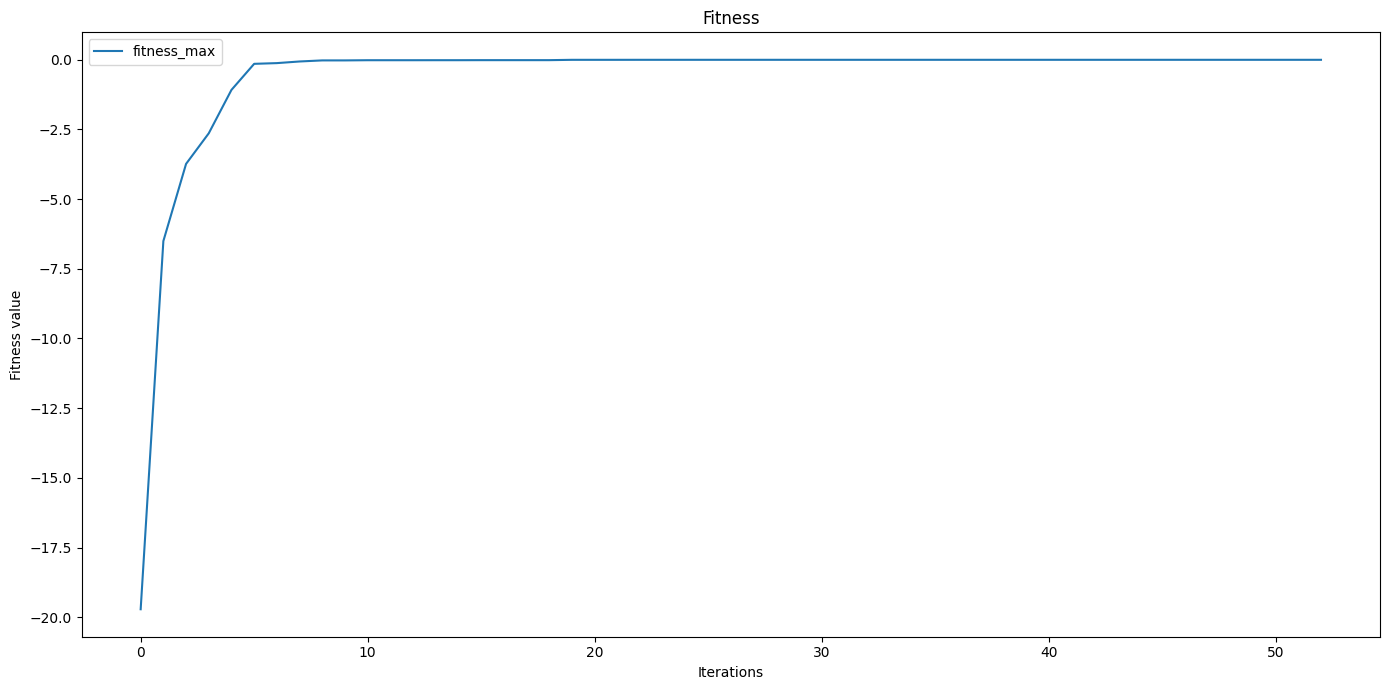

In [3]:
import numpy as np
from thefittest.optimizers import GeneticAlgorithm
from thefittest.tools.transformations import GrayCode
import matplotlib.pyplot as plt

def custom_problem(x):
    return (5 - x[:, 0])**2 + (12 - x[:, 1])**2


n_dimension = 2
left_border = -100.
right_border = 100.
n_bits_per_variable = 32

number_of_iterations = 100
population_size = 100

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)


genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=custom_problem,
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=10,
                         minimization=True,
                         optimal_value=0,
                         termination_error_value=1e-10,
                         keep_history=True,
                         elitism=False)


optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])


iters_done = len(stats['fitness_max'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=1)
ax.plot(range(iters_done), stats['fitness_max'], label = "fitness_max")
ax.set_title('Fitness')
ax.set_ylabel('Fitness value')
ax.set_xlabel("Iterations")
ax.legend()

plt.tight_layout()
plt.show()